# Titanic Survival Prediction

Project by: Mayur Rajput

## Project Goal :

The goal of this project is to build a machine learning model that predicts whether a passenger on the Titanic survived or not.

## Project Description :

In this data analytics project, we aim to create a predictive model that determines whether a passenger aboard the Titanic survived or not. The dataset we will be working with contains a variety of information about each passenger, including their age, gender, ticket class, fare, cabin details, and their ultimate survival status.

**Here's a step-by-step breakdown of what we'll do:**

**Data Collection:** We will gather data from a dataset that has information about different individuals, including whether a passenger on the Titanic survived or not.

**Data Examination:** We will look at the data to understand it better. We'll check if there are any missing values and explore the information it contains.

**Data Preparation:** Data is often messy, so we will clean it up. This means dealing with missing values and organizing the data in a way that a computer can understand.

**Building a Model:** We will use a computer program (a model) to learn from the data. It will learn the patterns that suggest whether a passenger on the Titanic survived or not.

**Testing the Model:** To make sure our model works well, we will test it using a different set of data that it hasn't seen before. This will help us see how accurate our model is in making predictions.

**Model Deployment:** Once we are satisfied with our model's accuracy, it can be used to predict whether a passenger on the Titanic survived or not.

## Information about dataset attributes :

**survival**: 0 = No, 1 = Yes
**pclass**	: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
**sex** :	Sex	
**Age** :	Age in years	
**sibsp**: No of siblings / spouses aboard the Titanic	
**parch**: No of parents / children aboard the Titanic	
**ticket**:	Ticket number	
**fare**:	Passenger fare	
**cabin**:	Cabin number	
**embarked**: 	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## 1. Importing Necessary Libraries

In [33]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 2. Loading Dataset

In [34]:
data = pd.read_csv('tested.csv')

##  3. Data Exploration

In [35]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
border: 1px solid black !important;
}
</style>

In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
data.shape

(418, 12)

In [38]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


#### 3.1 Identifying Missing Values in Dataset :

In [40]:
data.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

#### 3.2  Distribution Variables :

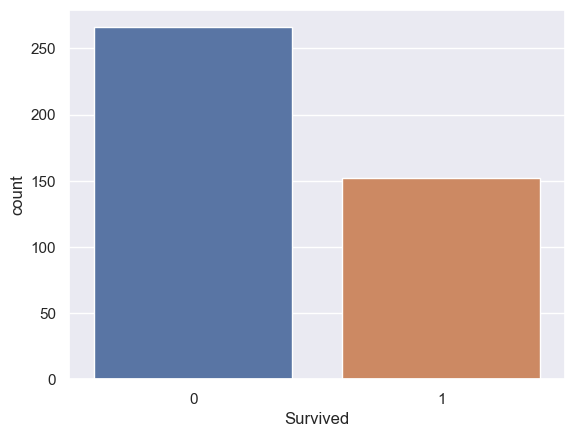

0    266
1    152
Name: Survived, dtype: int64

In [54]:
# Distribution of survival varable
sns.countplot(x='Survived', data=data)
plt.show()
data['Survived'].value_counts()

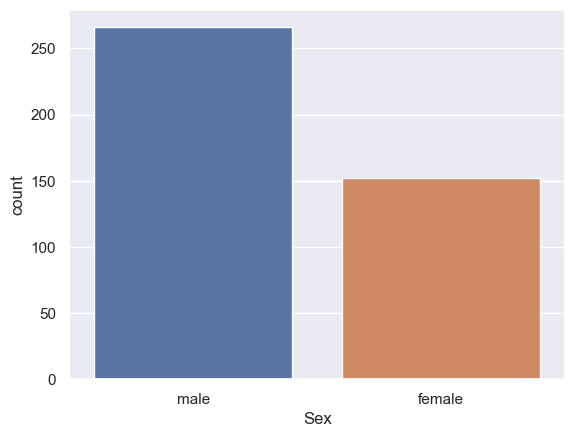

male      266
female    152
Name: Sex, dtype: int64

In [53]:
#Distribution of Gender variable
sns.countplot(x = 'Sex', data=data)
plt.show()
data['Sex'].value_counts()

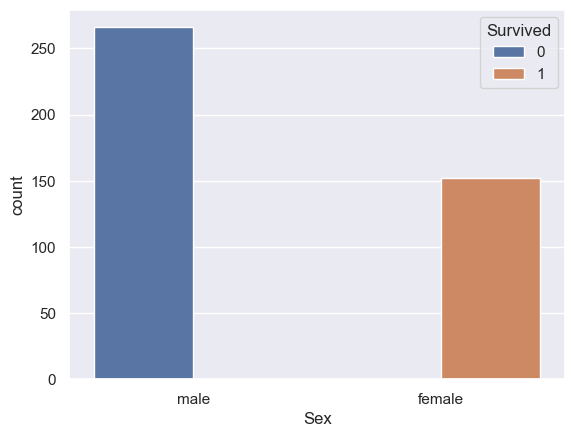

In [55]:
#Distribution of Genders based on Survival
sns.countplot(x='Sex', hue = 'Survived', data=data)
plt.show()

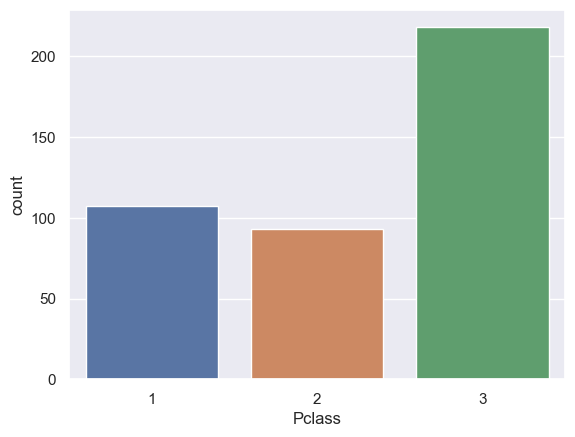

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [57]:
# Distribution of Pclass (Ticket Class) variable
sns.countplot(x='Pclass', data=data)
plt.show()
data['Pclass'].value_counts()

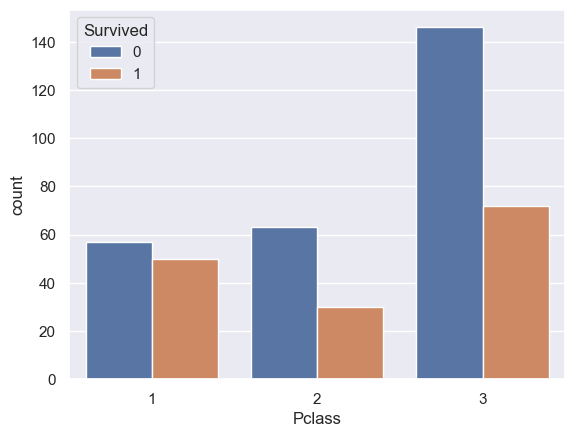

In [58]:
#Distribution of Pclass (Ticket Class) variable based on Survival
sns.countplot(x='Pclass', hue= 'Survived', data=data)
plt.show()

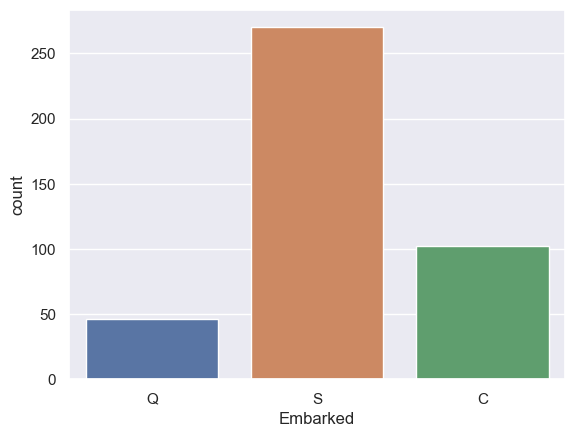

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [59]:
# Distribution of Embarked variable
sns.countplot(x='Embarked', data=data)
plt.show()
data['Embarked'].value_counts()

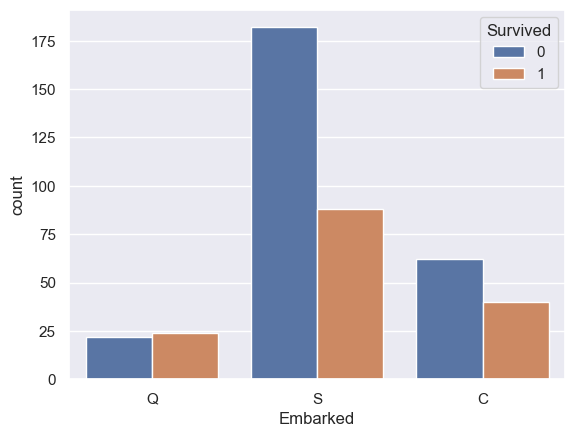

In [60]:
#Distribution of Embarked variable based on Survival
sns.countplot(x= 'Embarked', hue = 'Survived', data=data)
plt.show()

## 4. Data PreProcessing

### 4.1 - Handling Missing Values in Dataset :

In [43]:
# Cabin column is removed as it is having larger percentage of missing values.
data= data.drop('Cabin',axis = 1)

In [45]:
# Replaced missing values in Age & Fare columns with Mean value 
data['Age'].fillna(data['Age'].mean(), inplace =True)
data['Fare'].fillna(data['Fare'].mean(), inplace =True)

In [46]:
data.isnull().mean()*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [48]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 4.2 - One-Hot Encoding

Converting categorical data present in "Sex" and "Embarked" Columns into numerical format through techniques like one-hot encoding.

In [61]:
data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace = True)

In [63]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


### 4.3 - Defining Features and and Target variable

In [66]:
#Spliting data into feature(x) and target(Survived) variable
x = data.drop(columns = ['PassengerId','Name','Survived','Ticket'], axis = 1 )
y = data['Survived']

In [67]:
print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [68]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


### 4.4 - Spliting data into training and testing Model

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(418, 7) (334, 7) (84, 7)


## 5. Model Building & Training

For a binary classification task like Survival prediction (0 for person who died and 1 for person who survived), we’ll
use Logistic Regression. It’s a straightforward algorithm for this purpose

In [70]:
# Create an instance of the model
model = LogisticRegression()

In [71]:
# Training a created model with training data
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##  6. Model Evaluation

In [73]:
# Accuracy of training data
x_train_prediction = model.predict(x_train)

accuracy_train = accuracy_score(x_train_prediction, y_train)
print("Accuracy Score of training data:",accuracy_train)

Accuracy Score of training data: 1.0


In [74]:
# Accuracy of test data
x_test_prediction = model.predict(x_test)

accuracy_test = accuracy_score(x_test_prediction, y_test)
print("Accuracy Score of test data:",accuracy_test)

Accuracy Score of test data: 1.0


##  7. Model Deployement

In [78]:
# Create an empty list to store user input
input_data = []

# Define the list of features (replace with your actual feature names)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Loop through each feature to get user input
for feature in features:
    while True:
        try:
            value = float(input(f"Enter {feature}: "))
            input_data.append(value)
            break  # Exit the loop if input is valid
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

# Convert the list to a NumPy array
input_data_as_np_array = np.array(input_data)

# Now, user_input_as_np_array contains the input data as a NumPy array
print("User input data as a NumPy array:")
print(input_data_as_np_array)

Enter Pclass: 3
Enter Sex: 1
Enter Age: 22
Enter SibSp: 1
Enter Parch: 1
Enter Fare: 12.28
Enter Embarked: 0
User input data as a NumPy array:
[ 3.    1.   22.    1.    1.   12.28  0.  ]


In [79]:
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)


prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person did not Survived')
else:
  print('The person has survived')

[1]
The person has survived


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
